# Box Model 

<img src="../tests/input_files/Box-Model/figure.png" width="600">

In [1]:
import pandas as pd
import numpy as np
import h5py
import xarray as xr
import os
import sys
import datetime

import clearwater_riverine_functions as cw

In [2]:
print(os.listdir())
fpath = '../tests/input_files/Box-Model/BoxModel.p01.hdf'

h5py_file = h5py.File(fpath,
                      mode='r',  # Readonly, file must exist (default)
                     )

['.virtual_documents', 'advection_diffusion.ipynb', 'box-example.zarr', 'Box-Model.ipynb', 'clearwater_riverine_functions.py', 'compute_cell_volume_and_face_area.ipynb', 'compute_distances_between_cell_centers.ipynb', 'error_exploration.ipynb', 'File_Conversion.ipynb', 'HDF_Exploration.ipynb', 'HDF_Plotting.ipynb', 'model', 'RAS_HDF_to_xarray_examples.ipynb', 'Sparse_Matrix_Framework.ipynb', 'ugrid-example.nc', 'ugrid-example.zarr', '__pycache__']


In [3]:
def get_project_name(inp_file):
    return inp_file['Geometry/2D Flow Areas/Attributes'][()][0][0].decode('UTF-8')

In [4]:
project_name = get_project_name(h5py_file)
print(project_name)
h5py_file.close()

Box


### Volume

In [5]:
# get volume
# HEC-RAS input file
infile = fpath

# Results time series: Water Surface Elevation
water_surface_elev_xr = cw.read_dataset_xarray(infile, f'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{project_name}/Water Surface', dims = ['Time', 'Cells'])

# Geometry: Cell Volumes
cells_volume_elevation_info_df = cw.read_dataset_pandas(infile, f'Geometry/2D Flow Areas/{project_name}/Cells Volume Elevation Info')
cells_volume_elevation_values_df = cw.read_dataset_pandas(infile, f'Geometry/2D Flow Areas/{project_name}/Cells Volume Elevation Values')

# Geometry: Cell Surface Area
cells_surface_area_xr = cw.read_dataset_xarray(infile, f'Geometry/2D Flow Areas/{project_name}/Cells Surface Area', dims = ['Rows'])


In [6]:
ntimes, ncells = water_surface_elev_xr.shape

# eventually we should include all of the following in xarray just pass the xarray to the function! 
# for now just working with todd's code 

cell_volumes = cw.compute_cell_volumes(
    water_surface_elev_xr.values,
    cells_surface_area_xr.values,
    cells_volume_elevation_info_df['Starting Index'].values,
    cells_volume_elevation_info_df['Count'].values,
    cells_volume_elevation_values_df['Elevation'].values,
    cells_volume_elevation_values_df['Volume'].values,
    ntimes,
    ncells)
cell_volumes_df = pd.DataFrame(cell_volumes, columns = range(ncells))
cell_volumes_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,100.000000,100.000000,120.707443,100.000000,100.000000,120.707443,116.934418,116.934418,141.148544,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,139.648438,136.907959,163.187851,131.677246,128.009033,152.099930,136.904053,132.307755,157.353409,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,141.296387,138.818359,165.670670,134.027100,130.584717,155.326843,139.951599,135.191147,160.747726,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,141.284180,138.806152,165.655930,134.014893,130.572510,155.319473,139.951599,135.191147,160.747726,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,141.284180,138.806152,165.655930,134.014893,130.572510,155.319473,139.951599,135.191147,160.747726,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,141.284180,138.806152,165.655930,134.014893,130.572510,155.319473,139.951599,135.191147,160.747726,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,141.284180,138.806152,165.655930,134.014893,130.572510,155.319473,139.951599,135.191147,160.747726,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,141.284180,138.806152,165.655930,134.014893,130.572510,155.319473,139.951599,135.191147,160.747726,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,141.284180,138.806152,165.655930,134.014893,130.572510,155.319473,139.951599,135.191147,160.747726,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,141.284180,138.806152,165.655930,134.014893,130.572510,155.319473,139.951599,135.191147,160.747726,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Cell Volume')

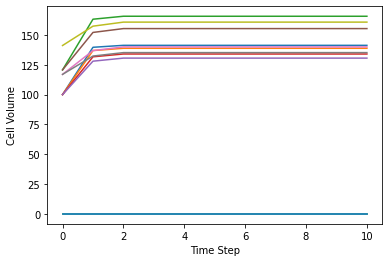

In [7]:
ax = cell_volumes_df.plot(legend=None)
ax.set_xlabel('Time Step')
ax.set_ylabel('Cell Volume')

In [9]:
cell_volumes = cell_volumes_df.to_numpy()

### Face Areas

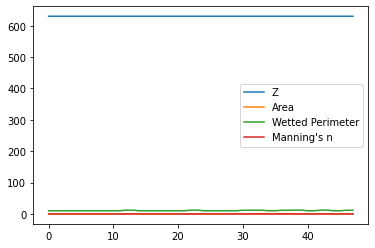

In [11]:
# Geometry: Cell Face Areas
faces_area_elevation_info_df = cw.read_dataset_pandas(infile, f'Geometry/2D Flow Areas/{project_name}/Faces Area Elevation Info')
faces_area_elevation_values_df = cw.read_dataset_pandas(infile, f'Geometry/2D Flow Areas/{project_name}/Faces Area Elevation Values')
faces_area_elevation_values_df.plot()
faces_normalunitvector_and_length_df = cw.read_dataset_pandas(infile, f'Geometry/2D Flow Areas/{project_name}/Faces NormalUnitVector and Length')
faces_cell_indexes_df = cw.read_dataset_pandas(infile, f'Geometry/2D Flow Areas/{project_name}/Faces Cell Indexes')

ntimes, ncells = water_surface_elev_xr.shape
nfaces = faces_cell_indexes_df.shape[0]

face_areas_0 = cw.compute_face_areas(
    water_surface_elev_xr.values,
    faces_normalunitvector_and_length_df['Face Length'].values,
    faces_cell_indexes_df['Cell 0'].values,
    faces_area_elevation_info_df['Starting Index'].values,
    faces_area_elevation_info_df['Count'].values,
    faces_area_elevation_values_df['Z'].values,
    faces_area_elevation_values_df['Area'].values,
    ntimes,
    ncells,
    nfaces)
face_areas_0_df = pd.DataFrame(face_areas_0, columns = range(nfaces))

Text(0, 0.5, 'Vertical Area')

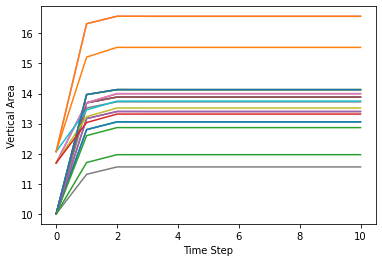

In [12]:
ax = face_areas_0_df.plot(legend=None)
ax.set_xlabel('Time Step')
ax.set_ylabel('Vertical Area')

In [13]:
face_areas = face_areas_0_df.to_numpy()

### Cells Surface Area
* Shape: (`NCELL`,)
* Values: surface area of the cell/face. 


In [14]:
cells_surface_area_xr

<xarray.DataArray (Rows: 21)>
array([100.     , 100.     , 120.70744, 100.     , 100.     , 120.70744,
       116.93442, 116.93442, 141.14854,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ], dtype=float32)
Coordinates:
  * Rows     (Rows) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Attributes:
    Can Plot:  False
    Column:    ['Surface Area']
    Row:       Cell

In [15]:
# src_path = os.path.join('..', 'src', 'riverine', 'ras2d')
# sys.path.insert(0, src_path)
# import RAS2D

class RAS_HDF5:
    '''
    Read HEC-RAS 2D geometry and variables and return as a dictionary
    '''

    def __init__(self, hdf5_file_path: str, variables: list = []):

        self.variables = {}
        self.hdf5_file_path = hdf5_file_path
        self.results = {}
        self.geometry = {}



    def read(self):
        with h5py.File(self.hdf5_file_path, 'r') as infile:
            '''
            Read the Geometry data
            '''

            project_name = infile['Geometry/2D Flow Areas/Attributes'][()][0][0].decode('UTF-8')

            # For the Muncie data set: max value: 5773, shape(5765, 7)
            self.geometry['elements_array'] = infile[f'Geometry/2D Flow Areas/{project_name}/Cells FacePoint Indexes'][()]
            # For the Muncie data set: shape(5774, 2)
            self.geometry['nodes_array'] = infile[f'Geometry/2D Flow Areas/{project_name}/FacePoints Coordinate'][()]
            self.geometry['faces_cell_indexes'] = infile[f'Geometry/2D Flow Areas/{project_name}/Faces Cell Indexes'][()]
            self.geometry['cells_surface_area'] = infile[f'Geometry/2D Flow Areas/{project_name}/Cells Surface Area'][()]
            self.geometry['faces_normal_unit_vector_and_length'] = infile[f'Geometry/2D Flow Areas/{project_name}/Faces NormalUnitVector and Length'][()]
            self.geometry['cells_center_coordinate'] = infile[f'Geometry/2D Flow Areas/{project_name}/Cells Center Coordinate'][()]
            # faces_area_elevation_values = infile['Geometry/2D Flow Areas/2D Interior Area/Faces Area Elevation Values'][()]

            self.geometry['face_length'] = self.geometry['faces_normal_unit_vector_and_length'][:,2]
            
            self.geometry['face_facepoint_connectivity'] = infile[f'Geometry/2D Flow Areas/{project_name}/Faces FacePoint Indexes'][()]


            '''
            Read the Results data
            '''
            # self.results['depth'] = infile[f'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{project_name}/Depth'][()]

            '''
            NOTE:
            The node velocities (Node X Vel and Node Y vel) are not automatically written to the HDF output file. 
            Have to opt into printing them to HDF: https://www.hec.usace.army.mil/software/hec-ras/documentation/HEC-RAS%205.0%202D%20Modeling%20Users%20Manual.pdf
            How to handle? Try/except? Do we need them?
            '''

            # self.results['node_x_velocity'] = infile[f'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{project_name}/Node X Vel'][()]
            # self.results['node_y_velocity'] = infile[f'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{project_name}/Node Y Vel'][()]
            self.results['face_velocity'] = infile[f'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{project_name}/Face Velocity'][()]
            # self.results['face_q'] = infile[f'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{project_name}/Face Q'][()]
            # self.results['node_speed'] = np.sqrt(self.results['node_x_velocity']**2 + self.results['node_y_velocity']**2)
            self.results['timestep'] = infile[f'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{project_name}/Time Step'][()]
            
            time_stamps_binary = infile['Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp'][()]

            # Read the specified variables, if any
            for variable in self.variables:
                data_path = f'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{project_name}/{variable}'
                self.results['variable'] = infile[data_path]

        # Convert from binary strings to utf8 strings
        time_stamps = [x.decode("utf8") for x in time_stamps_binary]
        self.results['dates'] = [datetime.datetime.strptime(x, '%d%b%Y %H:%M:%S') for x in time_stamps] # '02JAN1900 22:55:00'

        # Convert all lists to numpy arrays
        for key, value in self.geometry.items():
            self.geometry[key] = np.array(value)
        for key, value in self.results.items():
            self.results[key] = np.array(value)

In [179]:
with h5py.File(fpath, 'r') as f:

    project_name = f['Geometry/2D Flow Areas/Attributes'][()][0][0].decode('UTF-8')
    print( f[f'Geometry/2D Flow Areas/{project_name}/'].keys())
    print('----')
    # For the Muncie data set: shape(5774, 2)
    print(f[f'Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{project_name}/Boundary Conditions/'].keys())
            

<KeysViewHDF5 ['Cells Center Coordinate', "Cells Center Manning's n", 'Cells Face and Orientation Info', 'Cells Face and Orientation Values', 'Cells FacePoint Indexes', 'Cells Minimum Elevation', 'Cells Surface Area', 'Cells Volume Elevation Info', 'Cells Volume Elevation Values', 'FacePoints Cell Index Values', 'FacePoints Cell Info', 'FacePoints Coordinate', 'FacePoints Face and Orientation Info', 'FacePoints Face and Orientation Values', 'FacePoints Is Perimeter', 'Faces Area Elevation Info', 'Faces Area Elevation Values', 'Faces Cell Indexes', 'Faces FacePoint Indexes', 'Faces Low Elevation Centroid', 'Faces Minimum Elevation', 'Faces NormalUnitVector and Length', 'Faces Perimeter Info', 'Faces Perimeter Values', 'Perimeter']>
----
<KeysViewHDF5 ['North', 'North - Flow per Cell', 'North - Stage per Cell', 'South', 'South - Flow per Cell', 'South - Stage per Cell', 'West', 'West - Flow per Cell', 'West - Stage per Cell']>


In [20]:
%%time
ras2d_data = RAS_HDF5(fpath, variables=[])
ras2d_data.read()

CPU times: total: 15.6 ms
Wall time: 15.7 ms


## Explore Geometry

* `NCELL`: number of cells (`NPSEUDO + NREAL`) **(here, 21)**
* `NPSEUDO` : number of pseudo cells **(here, 12)**
* `NREAL`: number of actual cells **(here, 9)**
* `NEDGE`: number of edges **(here, 24)**
* `NFACEPOINT`: number of facepoints **(here, 16)**
* `MAX_SIZE`: max number of facepoints that make up a cell/face **(here, 4)**


### Facepoint Locations
* Shape: (`NFACEPOINT`, 2)
* Values: Northings and Eastings of facepoints (nodes)

In [21]:
print(ras2d_data.geometry['nodes_array'].shape)

(16, 2)


Text(0.5, 1.0, 'Facepoints')

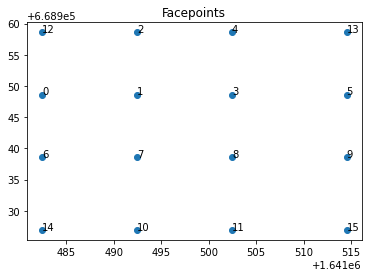

In [22]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

x = ras2d_data.geometry['nodes_array'].T[0]
y = ras2d_data.geometry['nodes_array'].T[1]

ax.scatter(x,y)

for i, txt in enumerate(x):
    ax.annotate(i, (x[i], y[i]))
ax.set_title("Facepoints")

### Elements Array
This provides the facepoint indices that make up each "cell" or "face."

* Shape: (`NCELL`, `MAX_SIZE`). 
* Values: -1 if none (indicates a cell smaller than `MAX_SIZE`) OR the indices of the facepoints making up a given cell/face.
    * Zero-indexed.


In general the shape will be (TOTAL CELLS (pseudo + real), MAX NUMBER OF FACES)

In [23]:
print(ras2d_data.geometry['elements_array'].shape)
print(ras2d_data.geometry['elements_array'].min())
print(ras2d_data.geometry['elements_array'].max())


(21, 4)
-1
15


### Faces Cell Indexes

* Shape: (`NEDGE`, 2)
* Values: Cell/face index values on either side of a given edge 
    * Zero indexed. 

In [25]:
print(ras2d_data.geometry['faces_cell_indexes'].shape)
print(ras2d_data.geometry['faces_cell_indexes'].min())
print(ras2d_data.geometry['faces_cell_indexes'].max())


(24, 2)
0
20


### Cells Surface Area
* Shape: (`NCELL`,)
* Values: surface area of the cell/face. 


In [26]:
print(ras2d_data.geometry['cells_surface_area'].shape)
print(ras2d_data.geometry['cells_surface_area'])


(21,)
[100.      100.      120.70744 100.      100.      120.70744 116.93442
 116.93442 141.14854   0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.     ]


### Cells Center Coordinate

Text(0.5, 1.0, 'Facepoints and Face Centers')

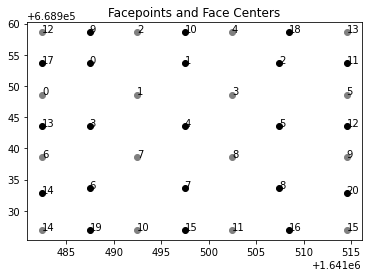

In [27]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

x = ras2d_data.geometry['nodes_array'].T[0]
y = ras2d_data.geometry['nodes_array'].T[1]

ax.scatter(x,y, color='grey')

for i, txt in enumerate(x):
    ax.annotate(i, (x[i], y[i]))
ax.set_title("Face Centers (Cell Centers)")

x1 = ras2d_data.geometry['cells_center_coordinate'].T[0]
y1 = ras2d_data.geometry['cells_center_coordinate'].T[1]

ax.scatter(x1,y1, color='black')

for i, txt in enumerate(x1):
    ax.annotate(i, (x1[i], y1[i]))
ax.set_title("Facepoints and Face Centers")


# Save to Xarray

In [28]:
out = xr.Dataset()

out["mesh2d"] = xr.DataArray(
    data=0,
    attrs={
        # required topology attributes
        'cf_role': 'mesh_topology',
        'long_name': 'Topology data of 2D mesh',
        'topology_dimension': 2,
        'node_coordinates': 'node_x node_y',
        'face_node_connectivity': 'face_nodes',
        # optionally required attributes
        'face_dimension': 'face',
        'edge_node_connectivity': 'edge_nodes',
        'edge_dimension': 'edge',
        # optional attributes 
        'face_edge_connectivity': 'face_edges',
        'face_face_connectivity': 'face_face_connectivity',
        'edge_face_connectivity': 'edge_face_connectivity',
        'boundary_node_connectivity': 'boundary_node_connectivity',
        'face_coordinates': 'face x face_y',
        'edge_coordinates': 'edge_x edge_y',
    }
)

In [29]:
out = out.assign_coords(
    node_x=xr.DataArray(
        data=[f[0] for f in ras2d_data.geometry['nodes_array']],
        dims=("node",),
    )
)


out = out.assign_coords(
    node_y=xr.DataArray(
        data=[f[1] for f in ras2d_data.geometry['nodes_array']],
        dims=("node",),
    )
)

out = out.assign_coords(
    time=xr.DataArray(
        data=ras2d_data.results['dates'],
        dims=("time",),
            )
        )


In [30]:
out["face_nodes"] = xr.DataArray(
    data=ras2d_data.geometry['elements_array'],
    coords={
        "face_x": ("nface", [f[0] for f in ras2d_data.geometry['cells_center_coordinate']]),
        "face_y": ("nface", [f[1] for f in ras2d_data.geometry['cells_center_coordinate']]),
    },
    dims=("nface", "nmax_face"),
    attrs={
        'cf_role': 'face_node_connectivity',
        'long_name': 'Vertex nodes of mesh faces (counterclockwise)',
        'start_index': 0, 
        '_FillValue': -1
    })

In [31]:
out["edge_nodes"] = xr.DataArray(
    data=ras2d_data.geometry['face_facepoint_connectivity'],
    dims=("nedge", '2'),
    attrs={
        'cf_role': 'edge_node_connectivity',
        'long_name': 'Vertex nodes of mesh edges',
        'start_index': 0
    })

In [32]:
out["edge_face_connectivity"] = xr.DataArray(
    data=ras2d_data.geometry['faces_cell_indexes'],
    dims=("nedge", '2'),
    attrs={
        'cf_role': 'edge_face_connectivity',
        'long_name': 'neighbor faces for edges',
        'start_index': 0
    })

In [33]:
out["dt"] = xr.DataArray(
    data=ras2d_data.results['timestep'],
    dims=("time"),
    attrs={
        'units':'seconds' # will need to update units based on prj file
    })

out["volume"] = xr.DataArray(
    data=cell_volumes,
    dims=("time", 'nface'),
    attrs={
        'units':'feet' # will need to update units based on prj file
    })

out["faces_surface_area"] = xr.DataArray(
    data = ras2d_data.geometry['cells_surface_area'],
    dims = ("nface"), 
    attrs={
        'units': 'square feet' # will need to update units based on prj file
})

out["edge_length"] = xr.DataArray(
    data = ras2d_data.geometry['face_length'],
    dims = ("nedge"), 
    attrs={
        'units': 'feet' # will need to update units based on prj file
})


out["edge_velocity"] = xr.DataArray(
    data=ras2d_data.results['face_velocity'],
    dims=("time", 'nedge'),
    attrs={
        'units':'feet per second' # will need to update units based on prj file
    })

out["edge_vertical_area"] = xr.DataArray(
    data=face_areas_0,
    dims=("time", 'nedge'),
    attrs={
        'units':'feet per second' # will need to update units based on prj file
    })

### Examine Variables

#### Volume

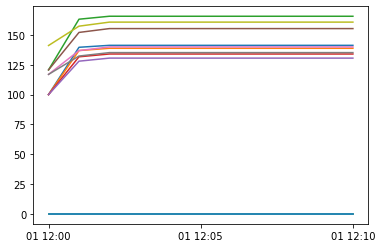

In [34]:
# plot volume over time for each cell
for f in out['nface']:
    # print(ds_zarr['volume'].compute().T.shape)
    plt.plot(out['time'], out['volume'].T[:][f])

plt.show()

#### Vertical Face Area

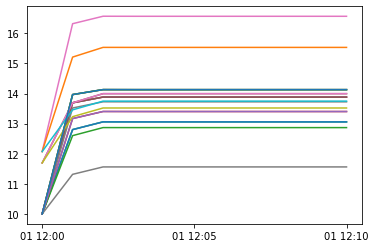

In [35]:
# plot volume over time for each cell
for f in out['nface']:
    # print(ds_zarr['volume'].compute().T.shape)
    plt.plot(out['time'], out['edge_vertical_area'].T[:][f])

plt.show()

### Edge Velocity
* **Positive** if it is flowing out of the first value of the `edge_face_connectivity` term. 
* **Negative** if it is flowing IN of the first cell index of the `edge_face_connectivity` term. 
* 0 for flow in/out of pseudo-cells - how are boundary conditons output from RAS?

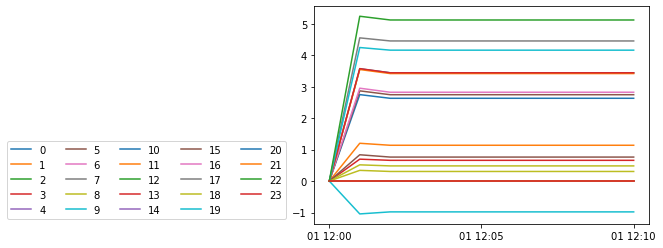

In [36]:
# plot face velocity over time for each cell 
for f in out['nedge']:
    # print(ds_zarr['volume'].compute().T.shape)
    plt.plot(out['time'], out['edge_velocity'].T[:][f], label=f.values)
plt.legend(ncol=5, loc='lower center', bbox_to_anchor=(-0.5, 0))
plt.show()

In [37]:
for i in range(len(out['nedge'])):
    print(i)
    print(out['edge_face_connectivity'][i].values)
    print(out['edge_velocity'][1][i].values)
    print("----------------------------")

0
[0 3]
2.7486396
----------------------------
1
[0 1]
1.2014995
----------------------------
2
[0 9]
-0.0
----------------------------
3
[1 2]
0.6964829
----------------------------
4
[ 1 10]
-0.0
----------------------------
5
[1 4]
2.867822
----------------------------
6
[2 5]
2.9528513
----------------------------
7
[ 2 11]
-0.0
----------------------------
8
[4 5]
0.51615405
----------------------------
9
[4 3]
-1.0443795
----------------------------
10
[4 7]
3.5695846
----------------------------
11
[5 8]
3.5462117
----------------------------
12
[ 5 12]
-0.0
----------------------------
13
[3 6]
3.5753481
----------------------------
14
[ 3 13]
-0.0
----------------------------
15
[6 7]
0.8362176
----------------------------
16
[ 6 14]
-0.0
----------------------------
17
[ 7 15]
4.552834
----------------------------
18
[7 8]
0.34034374
----------------------------
19
[ 8 16]
4.246044
----------------------------
20
[ 0 17]
-0.0
----------------------------
21
[ 2 18]
-0.0
-----

In [38]:
out['edge_face_connectivity']

<xarray.DataArray 'edge_face_connectivity' (nedge: 24, 2: 2)>
array([[ 0,  3],
       [ 0,  1],
       [ 0,  9],
       [ 1,  2],
       [ 1, 10],
       [ 1,  4],
       [ 2,  5],
       [ 2, 11],
       [ 4,  5],
       [ 4,  3],
       [ 4,  7],
       [ 5,  8],
       [ 5, 12],
       [ 3,  6],
       [ 3, 13],
       [ 6,  7],
       [ 6, 14],
       [ 7, 15],
       [ 7,  8],
       [ 8, 16],
       [ 0, 17],
       [ 2, 18],
       [ 6, 19],
       [ 8, 20]])
Dimensions without coordinates: nedge, 2
Attributes:
    cf_role:      edge_face_connectivity
    long_name:    neighbor faces for edges
    start_index:  0

In [39]:
np.sign(-0.)

0.0

In [40]:
# ultimately transition this to xarray attributes?
class Params:
    def __init__(self):
        self.diffusion_coefficient = 0.1
        self.beta = 1

params = Params() 
    

### Distance between Centroids

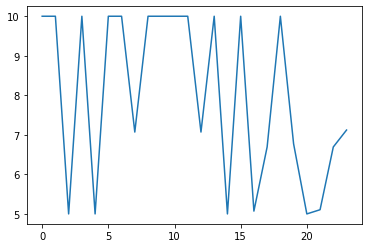

In [41]:
f1 = out['edge_face_connectivity'].T[0]
f2 = out['edge_face_connectivity'].T[1]

x1_coords = out['face_x'][f1]
y1_coords = out['face_y'][f1]
x2_coords = out['face_x'][f2]
y2_coords = out['face_y'][f2]

dist_data = np.sqrt((x1_coords - x2_coords)**2 + (y1_coords - y2_coords)**2)
out["face_to_face_dist"] = xr.DataArray(
    data = dist_data,
    dims = ("nedge"), 
    attrs={
        'units': 'feet' # will need to update units based on prj file
})

plt.plot(out['nedge'], out['face_to_face_dist'])

### Coefficient of the Diffusion Term

**08/10/2022 internal call**: decide to ignore diffusion between cells and ghost cells at least for now. Turn diffusion coefficient for all faces adjacent to a ghost cell to 0. 
* TO DO: Is this actually a problem? Why can't we include it? Is it because there is some volume?

In [50]:
# diffusion coefficient: ignore diffusion between cells in the mesh and ghost cells
diffusion_coefficient = np.zeros(len(out['nedge']))

# identify ghost cells: 
# ghost cells are only in the second element of a pair or cell indices that denote an edge together
f1 = out['edge_face_connectivity'].T[0]
f2 = out['edge_face_connectivity'].T[1]

f1_ghost = np.where(f1 <= 8) # to do: adapt code for flexibility
f2_ghost = np.where(f2 <= 8)
# print(f2_ghost)

# set diffusion coefficients where NOT pseusdo cell 
diffusion_coefficient[np.array(f2_ghost)] = params.diffusion_coefficient

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [197]:
# diffusion_array = np.zeros((len(out['time']), len(out['nedge'])))

diffusion_array =  out['edge_vertical_area'] * params.diffusion_coefficient / out['face_to_face_dist']

out["diffusion_coeff"] = xr.DataArray(
    data = diffusion_array,
    dims = ("time", "nedge"), 
    attrs={
        'units': 'feet' # will need to update units based on prj file
})

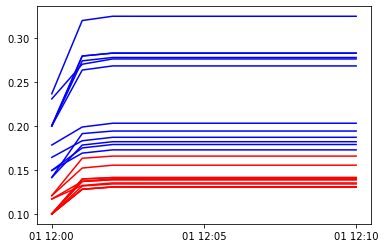

In [139]:
# plot face velocity over time for each cell 
for f in out['nedge']:
    # print(ds_zarr['volume'].compute().T.shape)
    if f.values in f2_ghost[0]:
        color = 'blue'
    else:
        color = 'red'
    plt.plot(out['time'], out['diffusion_coeff'].T[:][f], color = color)
# plt.legend(ncol=5, loc='lower center', bbox_to_anchor=(-0.5, 0))
plt.show()

#### Sum of Diffusion Coefficients - for Diagonal Term

In [154]:
def sum_vals(face, time_index, sum_array):
    '''
    https://stackoverflow.com/questions/67108215/how-to-get-sum-of-values-in-a-numpy-array-based-on-another-array-with-repetitive
    '''
    # _, idx, _ = np.unique(face, return_counts=True, return_inverse=True)
    nodal_values = np.bincount(face.values, out['diffusion_coeff'][time_index])
    sum_array[0:len(nodal_values)] = nodal_values
    return sum_array


# initialize array
sum_diffusion_array = np.zeros((len(out['time']), len(out['nface'])))

# FACE 1 
for t in range(len(out['time'])):
    f1_sums = np.zeros(len(out['nface'])) 
    f2_sums = np.zeros(len(out['nface']))

    f1_sums = sum_vals(f1, t, f1_sums)
    f2_sums = sum_vals(f2, t, f2_sums)

    sum_diffusion_array[t] = f1_sums + f2_sums

out["sum_diffusion_coeff"] = xr.DataArray(
    data = sum_diffusion_array,
    dims = ("time", "nface"), 
    attrs={
        'units': 'feet' # will need to update units based on prj file
})

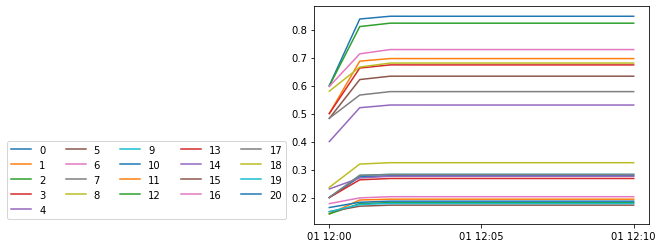

In [155]:
for f in out['nface']:
    # print(ds_zarr['volume'].compute().T.shape)
    plt.plot(out['time'], out['sum_diffusion_coeff'].T[:][f],  label=f.values)
plt.legend(ncol=5, loc='lower center', bbox_to_anchor=(-0.5, 0))
plt.show()

In [156]:
out['sum_diffusion_coeff'][1][0].values

array(0.83789211)

#### Advection Coefficient

In [198]:
# face normal water flow
# edge_normal_water_flow = np.zeros((len(out['time']), len(out['nedge'])))

# for t in range(len(out['time'])):
edge_normal_water_flow = out['edge_vertical_area'] * out['edge_velocity'] ##updated: units shoudl be in L3/T, not L3. 
     # * out['dt'][t] # L2 * L/T * T = L3

out["advection_coeff"] = xr.DataArray(
    data = edge_normal_water_flow,
    dims = ("time", "nedge"), 
    attrs={
        'units': 'cubic feet' # will need to update units based on prj file
})

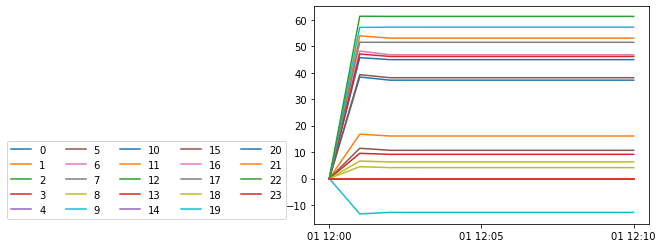

In [199]:
for f in out['nedge']:
    # print(ds_zarr['volume'].compute().T.shape)
    plt.plot(out['time'], out['advection_coeff'].T[:][f], label=f.values)
plt.legend(ncol=5, loc='lower center', bbox_to_anchor=(-0.5, 0))
plt.show()

#### Ghost Cells Volume Out

For ghost cells receiving outflow, the volume will be the flow across the face * time. This will allow us to use the total load advection-diffusion equation. 

In [185]:
# find ghost cells receiving flow 
nreal = f1.max()
f2_ghost = np.where(f2 > nreal)[0]  

# criteria: positive velocity = flowing in 
# f2_adv = 

# print(f2_ghost)

ghost_vels = np.zeros((len(out['time']), len(out['nedge'])))

for t in range(len(out['time'])):
    # positive velocities
    positive_velocity_indices = np.where(out['edge_velocity'][t] > 0 )[0]

    # get intersection - this is where water is flowing OUT to a ghost cell
    index_list = np.intersect1d(positive_velocity_indices, f2_ghost)

    if len(index_list) == 0:
        pass
    else:
        ghost_vels[t][index_list] = out['edge_velocity'][t][index_list]


In [186]:
ghost_flux_vols = ghost_vels * out['edge_vertical_area'] * out['dt']

In [187]:
# transfer values to corresponding CELLs

ghost_vols = np.zeros((len(out['time']), len(out['nface'])))
for t in range(len(out['time'])):
    indices = np.where(ghost_flux_vols[t] > 0)[0]
    cell_ind = f2[indices]
    vals = ghost_flux_vols[t][indices]
    if len(cell_ind) > 0:
        ghost_vols[t][np.array(cell_ind)] = vals 
    else:
        pass

In [164]:
out["ghost_volumes"] = xr.DataArray(
    data = ghost_vols,
    dims = ("time", "nface"), 
    attrs={
        'units': 'cubic feet' # will need to update units based on prj file
})

# Save to Zarr

In [166]:

# Save to Zarr
out.to_zarr('box-example.zarr',
           mode='w',
           consolidated=True,  # http://xarray.pydata.org/en/stable/user-guide/io.html#consolidated-metadata
          )